In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyzazkefe/trashnet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/trashnet


In [5]:
# Set paths
train_dir = path + '/dataset-resized'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [6]:
# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 431ms/step - accuracy: 0.2566 - loss: 1.7509 - val_accuracy: 0.3201 - val_loss: 1.6076
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.4122 - loss: 1.4466 - val_accuracy: 0.3559 - val_loss: 1.5257
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - accuracy: 0.4300 - loss: 1.3976 - val_accuracy: 0.3956 - val_loss: 1.4880
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.4362 - loss: 1.3528 - val_accuracy: 0.4433 - val_loss: 1.4067
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.5170 - loss: 1.2704 - val_accuracy: 0.4354 - val_loss: 1.4228
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - accuracy: 0.5118 - loss: 1.2683 - val_accuracy: 0.4354 - val_loss: 1.3953
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.5166 - loss: 1.2410 - val_accuracy: 0.4354 - val_loss: 1.4199
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - accuracy: 0.5652 - loss: 1.1602 - val_accu

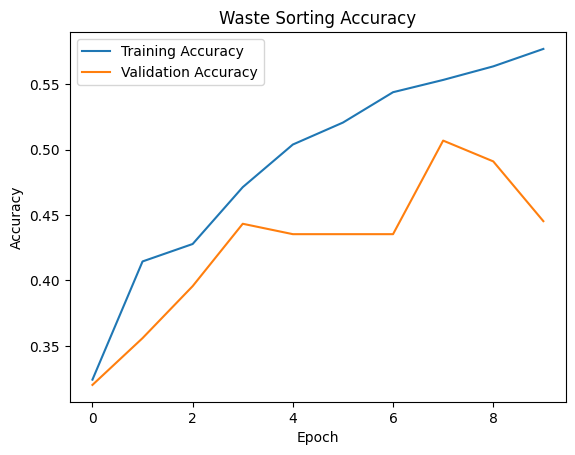

In [9]:
# Plot results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Waste Sorting Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.4605 - loss: 1.3707
Validation Accuracy: 0.4533


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


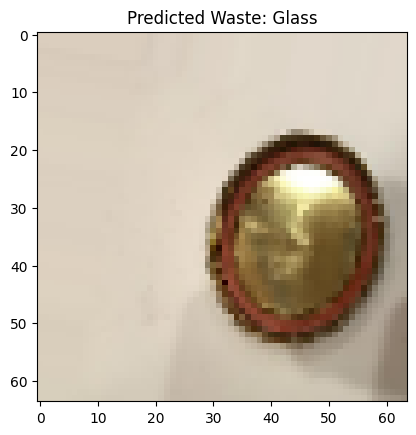

In [11]:
# Predict on a sample image
sample_image, _ = next(val_generator)
pred = model.predict(sample_image)
classes = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']
plt.imshow(sample_image[0])
plt.title(f"Predicted Waste: {classes[np.argmax(pred[0])]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


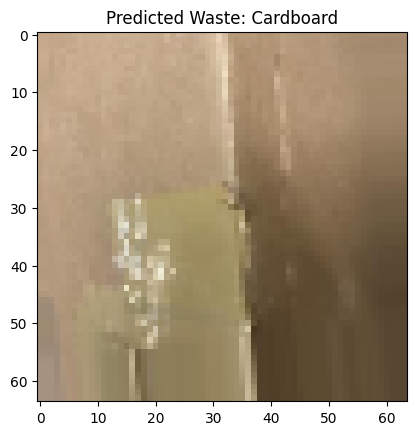

In [12]:
# Predict on a sample image
sample_image, _ = next(val_generator)
pred = model.predict(sample_image)
classes = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']
plt.imshow(sample_image[0])
plt.title(f"Predicted Waste: {classes[np.argmax(pred[0])]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


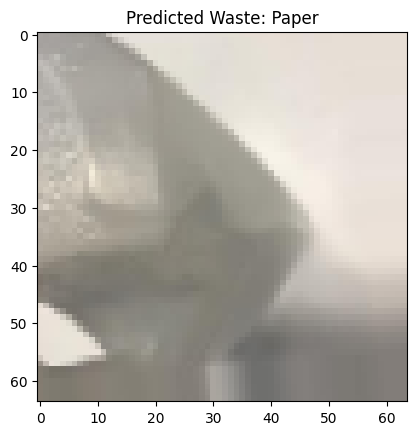

In [13]:
# Predict on a sample image
sample_image, _ = next(val_generator)
pred = model.predict(sample_image)
classes = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']
plt.imshow(sample_image[0])
plt.title(f"Predicted Waste: {classes[np.argmax(pred[0])]}")
plt.show()